## Save Training Set and Testing Set
Download the word image of IAM dataset from [Kaggle Dataset](https://www.kaggle.com/datasets/nibinv23/iam-handwriting-word-database)

## Step 1. Data Processing

### 1.1 Loading the Data

In [ ]:
import os

# Change to desired directory where pickled file of sliced dataset are saved
os.chdir('/save/to/path')

# Confirm it's changed
print("Current directory:", os.getcwd())

In [2]:
import os
images_dir = 'dataset/iam'

In [3]:
import pandas as pd
from PIL import Image
label_file_path = images_dir + '/words.txt'
image_file_path = images_dir + '/words'

data = []
with open(label_file_path, 'r') as f:
    lines = f.readlines()

for idx, line in enumerate(lines[18:]):
    if idx % 1000 == 0:
        print(f"Processing line {idx}")
    row = []
    tokens = line.strip().split()
    if len(tokens) < 2:
        continue

    subfolder = tokens[0].split('-')[0]
    subfolder2 = subfolder + "-" + tokens[0].split('-')[1]
    image_file_name = subfolder + "/" + subfolder2 + "/" + tokens[0] + ".png"
    image_path = os.path.join(image_file_path, image_file_name)
    try:
        with Image.open(image_path) as img:
            if img.size[0] >= 10 and img.size[1] >= 10:
                img_rgb = img.convert("RGB")  # Convert to RGB
                img_copy = img_rgb.copy()     # Copy after conversion
    except FileNotFoundError as e:
        print(f"Image file not found: {image_file_path}. Error: {e}")
        continue
    except Image.UnidentifiedImageError as e:
        print(f"Unidentified image error for file {image_file_path}: {e}")
        continue
    except Exception as e:
        print(f"Error opening image file {image_file_path}: {e}")
        continue
    row = [image_file_name, tokens[1], tokens[2], tokens[-1], img_copy]
    # if len(row) != 10:
    #     print(f"Row length mismatch: {len(row)} elements in row: {row}")
    #     continue
    data.append(row)


print(f"Length of a row in data: {len(data[0])}")  # Should print 10

print(data[0])
loaded = pd.DataFrame(data, columns=['image_id', 'segmentation_status', 'graylevel','text', 'image'])

Processing line 0
Processing line 1000
Processing line 2000
Processing line 3000
Processing line 4000
Unidentified image error for file dataset/iam/words: cannot identify image file 'dataset/iam/words/a01/a01-117/a01-117-05-02.png'
Processing line 5000
Processing line 6000
Processing line 7000
Processing line 8000
Processing line 9000
Processing line 10000
Processing line 11000
Processing line 12000
Processing line 13000
Processing line 14000
Processing line 15000
Processing line 16000
Processing line 17000
Processing line 18000
Processing line 19000
Processing line 20000
Processing line 21000
Processing line 22000
Processing line 23000
Processing line 24000
Processing line 25000
Processing line 26000
Processing line 27000
Processing line 28000
Processing line 29000
Processing line 30000
Processing line 31000
Processing line 32000
Processing line 33000
Processing line 34000
Processing line 35000
Processing line 36000
Processing line 37000
Processing line 38000
Processing line 39000
Pro

In [4]:
loaded_dfwords = loaded.copy()

In [5]:
loaded_dfwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44563 entries, 0 to 44562
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   image_id             44563 non-null  object
 1   segmentation_status  44563 non-null  object
 2   graylevel            44563 non-null  object
 3   text                 44563 non-null  object
 4   image                44563 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [6]:
loaded_dfwords.head()

,image_id,segmentation_status,graylevel,text,image
0,a01/a01-000u/a01-000u-00-00.png,ok,154,A,<PIL.Image.Image image mode=RGB size=27x51 at ...
1,a01/a01-000u/a01-000u-00-01.png,ok,154,MOVE,<PIL.Image.Image image mode=RGB size=213x48 at...
2,a01/a01-000u/a01-000u-00-02.png,ok,154,to,<PIL.Image.Image image mode=RGB size=70x50 at ...
3,a01/a01-000u/a01-000u-00-03.png,ok,154,stop,<PIL.Image.Image image mode=RGB size=166x78 at...
4,a01/a01-000u/a01-000u-00-04.png,ok,154,Mr.,<PIL.Image.Image image mode=RGB size=126x61 at...


### 1.2 Removing Unused Columns

In [7]:
loaded_dfwords.drop(columns=['segmentation_status','graylevel','image'], inplace=True)

In [8]:
loaded_dfwords.head()

,image_id,text
0,a01/a01-000u/a01-000u-00-00.png,A
1,a01/a01-000u/a01-000u-00-01.png,MOVE
2,a01/a01-000u/a01-000u-00-02.png,to
3,a01/a01-000u/a01-000u-00-03.png,stop
4,a01/a01-000u/a01-000u-00-04.png,Mr.


### 1.3 Show image

In [9]:
import matplotlib.pyplot as plt

def show_image(df, row):
    # plt.imshow(df.iloc[row]['image'], cmap='gray')
    img = Image.open(image_file_path+ '/'+df.iloc[row]['image_id'])
    plt.imshow(img, cmap='gray')
    plt.show()

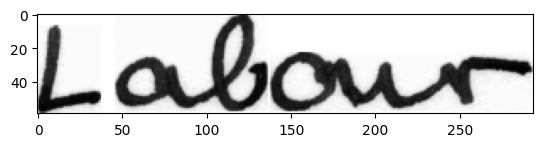

In [10]:
show_image(loaded_dfwords, 10)  # Show the first image

## Step 2. Cleaning the Data

### 2.1 Speical Character

In [11]:
import re

# Patter for all Special characters
special_char_pattern = r'[^a-zA-Z0-9\s]'  # Matches anything not alphanumeric or whitespace

# Select rows with special characters
special_char_rows = loaded_dfwords[loaded_dfwords['text'].str.contains(special_char_pattern, regex=True, na=False)]

In [12]:
special_char_rows.head(5)

,image_id,text
4,a01/a01-000u/a01-000u-00-04.png,Mr.
24,a01/a01-000u/a01-000u-03-02.png,.
25,a01/a01-000u/a01-000u-03-03.png,Mr.
43,a01/a01-000u/a01-000u-05-07.png,Mr.
46,a01/a01-000u/a01-000u-06-01.png,","


In [13]:
allowed_pattern = r'^[\w\s\.,!?;:\-+*/=()\[\]{}<>@#\$%^&_\'"\t\n]+$'
mask = ~loaded_dfwords['text'].str.contains(allowed_pattern, regex=True)
non_standard_rows = loaded_dfwords[mask]

In [14]:
non_standard_rows.head()

,image_id,text


In [15]:
mask = loaded_dfwords['text'].str.contains(r'\\', regex=True)
check_rows= loaded_dfwords[mask]

In [16]:
loaded_dfwords['text'] = loaded_dfwords['text'].str.replace('\\/', '/', regex=False)

In [17]:
mask = ~loaded_dfwords['text'].str.contains(allowed_pattern, regex=True)
non_standard_rows2 = loaded_dfwords[mask]

In [18]:
print("Words with special character:", len(non_standard_rows2), ", Percentage: ", len(non_standard_rows2)/len(loaded_dfwords))
print("Images with special character:", len(non_standard_rows2['image_id'].unique()), ", Percentage: ", len(non_standard_rows2['image_id'].unique())/len(loaded_dfwords['image_id'].unique()))

Words with special character: 0 , Percentage:  0.0
Images with special character: 0 , Percentage:  0.0


In [19]:
loaded_dfwords=loaded_dfwords[~mask]

In [20]:
print("total number of words", len(loaded_dfwords))

total number of words 44563


In [21]:
# confirm there is no special characters
count_matching = loaded_dfwords['text'].str.contains(allowed_pattern, regex=True, na=False).sum()
print(f"Number of rows with allowed characters: {count_matching}")

Number of rows with allowed characters: 44563


In [22]:
pattern = r'^[^a-zA-Z0-9]+$'  # Matches strings with no alphanumeric chars at all
non_alnum_rows = loaded_dfwords[loaded_dfwords['text'].str.contains(pattern, regex=True, na=False)]

In [23]:
print("total number of words", len(loaded_dfwords))

total number of words 44563


In [24]:
non_alnum_rows.head(5)

,image_id,text
24,a01/a01-000u/a01-000u-03-02.png,.
46,a01/a01-000u/a01-000u-06-01.png,","
51,a01/a01-000u/a01-000u-06-06.png,.
76,a01/a01-000x/a01-000x-02-05.png,.
98,a01/a01-000x/a01-000x-04-10.png,","


### 2.2 All-symbol Text

In [25]:
# check other rows that have only characters
pattern = r'^[^a-zA-Z0-9]+$'  # Matches strings with no alphanumeric chars at all
non_alnum_rows2 = loaded_dfwords[loaded_dfwords['text'].str.contains(pattern, regex=True, na=False)]

In [26]:
non_alnum_rows2.head()

,image_id,text
24,a01/a01-000u/a01-000u-03-02.png,.
46,a01/a01-000u/a01-000u-06-01.png,","
51,a01/a01-000u/a01-000u-06-06.png,.
76,a01/a01-000x/a01-000x-02-05.png,.
98,a01/a01-000x/a01-000x-04-10.png,","


In [27]:
non_alnum_rows2['text'].value_counts()

text
.      1906
,      1819
"       625
-       169
)       141
(       141
:        89
;        69
#        39
?        37
'        36
!        26
...      17
*         3
Name: count, dtype: int64

In [28]:
# remove these to match the other imgur dataset preprocessing (it also removes all instances of text as '.' due to incorrect labels)
only_period_rows= loaded_dfwords[loaded_dfwords['text'] == '.']
loaded_dfwords = loaded_dfwords[loaded_dfwords['text'] != '.']

In [29]:
loaded_dfwords = loaded_dfwords[loaded_dfwords['text'] != '-----------------------------------------------------']

In [30]:
loaded_dfwords = loaded_dfwords.reset_index(drop=True)

In [31]:
loaded_dfwords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42657 entries, 0 to 42656
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  42657 non-null  object
 1   text      42657 non-null  object
dtypes: object(2)
memory usage: 666.6+ KB


## Step 3. Splitting the Data into Training and Testing Subsets

### 3.1 Spliting into Training and Testing Set

In [32]:
import numpy as np

# Get unique groups
unique_images = loaded_dfwords['image_id'].unique()


# Randomly select 10% for test 
np.random.seed(42)
test_images = np.random.choice(unique_images, 
                              size=int(len(unique_images)*0.2), 
                              replace=False)

In [33]:
test_df = loaded_dfwords[loaded_dfwords['image_id'].isin(test_images)]
training_df = loaded_dfwords[~loaded_dfwords['image_id'].isin(test_images)]

In [34]:
print("Words in Train Dataset:", len(training_df), ", Percentage: ", len(training_df)/len(loaded_dfwords))

Words in Train Dataset: 34126 , Percentage:  0.8000093771245048


In [35]:
print("Words in Test Dataset:", len(test_df), ", Percentage: ", len(test_df)/len(loaded_dfwords))

Words in Test Dataset: 8531 , Percentage:  0.19999062287549524


In [36]:
print("total number of words", len(loaded_dfwords))

total number of words 42657


### 3.2 Saving the Dataset to CSV

In [37]:
training_df = training_df.assign(word_idx=training_df.index)

In [38]:
training_df.head()

,image_id,text,word_idx
2,a01/a01-000u/a01-000u-00-02.png,to,2
3,a01/a01-000u/a01-000u-00-03.png,stop,3
5,a01/a01-000u/a01-000u-00-05.png,Gaitskell,5
6,a01/a01-000u/a01-000u-00-06.png,from,6
8,a01/a01-000u/a01-000u-01-01.png,any,8


In [39]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34126 entries, 2 to 42656
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  34126 non-null  object
 1   text      34126 non-null  object
 2   word_idx  34126 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [43]:
training_df.to_csv("iam/dataset/dataset_info/df_train_info.csv")

In [44]:
test_df = test_df.assign(word_idx=test_df.index)

In [45]:
test_df.head()

,image_id,text,word_idx
0,a01/a01-000u/a01-000u-00-00.png,A,0
1,a01/a01-000u/a01-000u-00-01.png,MOVE,1
4,a01/a01-000u/a01-000u-00-04.png,Mr.,4
7,a01/a01-000u/a01-000u-01-00.png,nominating,7
13,a01/a01-000u/a01-000u-02-00.png,is,13


In [47]:
test_df.to_csv("iam/dataset/dataset_info/df_test_info.csv")